
<div class="alert alert-block alert-success ">

# <span style=" color:Purple"> Seaborn-Part 2
Seaborn is a Python data visualization library based on Matplotlib.  It provides a high-level interface for drawing attractive and informative statistical graphics.
    
Here is some of the functionality that seaborn offers:

- A dataset-oriented API for examining relationships between multiple variables
- Specialized support for using categorical variables to show observations or aggregate statistics
- Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
- Automatic estimation and plotting of linear regression models for different kinds dependent variables
- Convenient views onto the overall structure of complex datasets
- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
- Concise control over matplotlib figure styling with several built-in themes
- Tools for choosing color palettes that faithfully reveal patterns in your data
    
Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.</span>

<div class="alert alert-block alert-info">
<span style=" color:Purple">Import Libraries
</span>

In [75]:
# Basic Libraries
import pandas as pd
import numpy as np

# Libraries for visualizaton
import matplotlib.pyplot as plt
import seaborn as sns

#print(sns.get_dataset_names())

In [76]:
###########################
##    Load Tips Dataset
###########################

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [179]:
##########################################
##    Examine Some Statistics Evaluation
##########################################

tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Countplot
A simple plot, it merely shows the total count of rows per category.
    
- seaborn.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)</span>

In [78]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

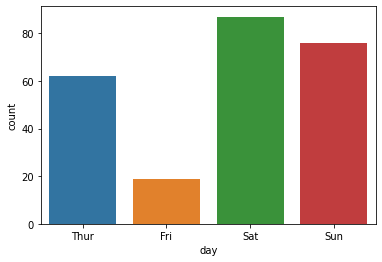

In [231]:
sns.countplot(x= "day", data = tips);

C:\Users\ms\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


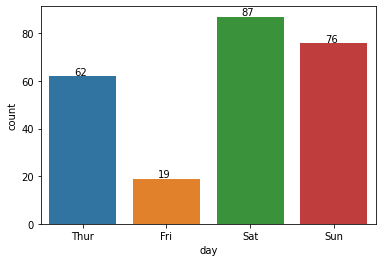

In [238]:
fig, ax = plt.subplots()

ax = sns.countplot(tips["day"], data=tips)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+0.5));
    
    # matplotlib.pyplot.annotate(text, xy, *args, **kwargs)
    # [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html]

In [233]:
print(ax.patches)

[<matplotlib.patches.Rectangle object at 0x000001976AC70448>, <matplotlib.patches.Rectangle object at 0x000001976AC70EC8>, <matplotlib.patches.Rectangle object at 0x000001976AC70F88>, <matplotlib.patches.Rectangle object at 0x000001976AC78DC8>]


In [234]:
for p in ax.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.8, height=62, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=19, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=87, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=76, angle=0)


<AxesSubplot:xlabel='day', ylabel='count'>

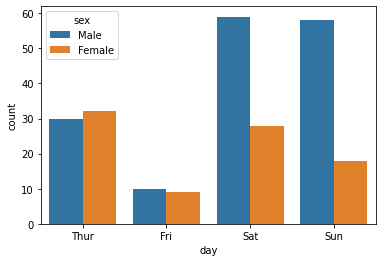

In [239]:
sns.countplot(x = "day", data = tips, hue = "sex")

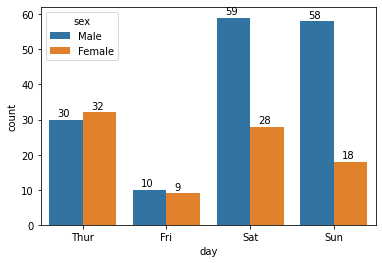

In [240]:
fig, ax = plt.subplots()

ax = sns.countplot(x='day', data=tips, hue="sex")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1));

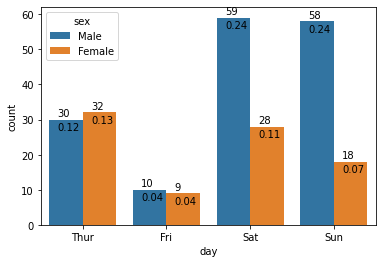

In [241]:
fig, ax = plt.subplots()

ax = sns.countplot(x='day', data=tips, hue="sex")

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1))
    ax.text(p.get_x()+0.1, p.get_height()-3,str(round(p.get_height()/tips.day.count(),2)) )     # yüzdelik ekledik

In [123]:
###########################
##    Load mpg Dataset
###########################

mpg=sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='cylinders', ylabel='count'>

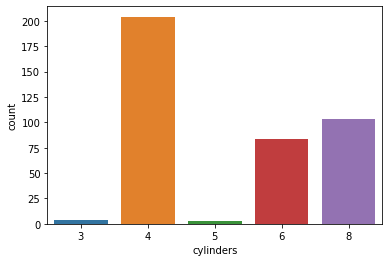

In [242]:
sns.countplot(x = "cylinders", data = mpg )

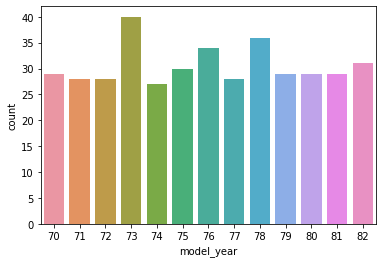

In [244]:
sns.countplot(x='model_year', data=mpg);

<AxesSubplot:xlabel='origin', ylabel='count'>

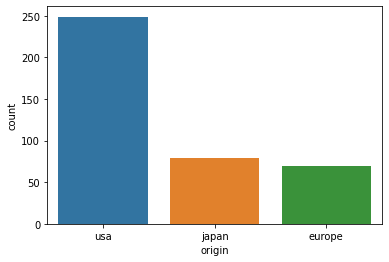

In [245]:
sns.countplot(x="origin", data = mpg)

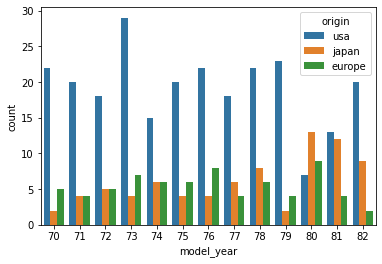

In [246]:
sns.countplot(x ="model_year", hue = "origin", data = mpg);

In [ ]:
############################################################################################################################

<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Barplot
So far we've seen the y axis default to a count (similar to a .groupby(x_axis).count() call in pandas). We can expand our visualizations by specifying a specific continuous feature for the y-axis. Keep in mind, you should be careful with these plots, as they may imply a relationship continuity along the y axis where there is none
    
    
- seaborn.barplot( x=None, y=None, hue=None, data=None, order=None, hue_order=None,  ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)</span>



In [247]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

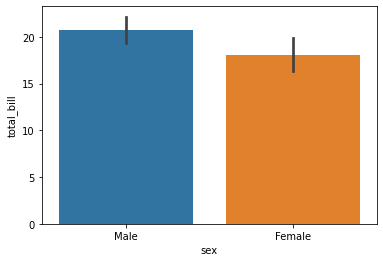

In [248]:
sns.barplot(x = "sex", y = "total_bill", data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

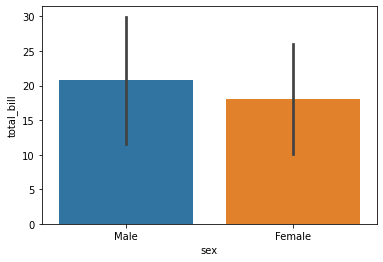

In [252]:
sns.barplot(x = "sex", y = "total_bill", data=tips, ci = "sd")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

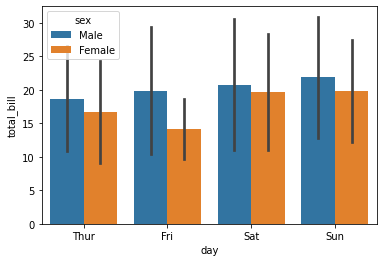

In [254]:
sns.barplot(x='day', y="total_bill",data=tips, hue='sex', ci = "sd")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

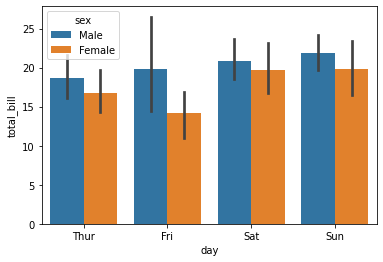

In [258]:
sns.barplot(x='day', y="total_bill",data=tips, hue='sex', estimator=np.mean) 

In [131]:
tips.groupby(["day","sex"]).sum()

total_bill     tip  size
day  sex                             
Thur Male        561.44   89.41    73
     Female      534.89   82.42    79
Fri  Male        198.57   26.93    21
     Female      127.31   25.03    19
Sat  Male       1227.35  181.95   156
     Female      551.05   78.45    63
Sun  Male       1269.46  186.78   163
     Female      357.70   60.61    53

estimator param (np.mean, np.median, np.sum, np.max, np.min, np.count_nonzero)

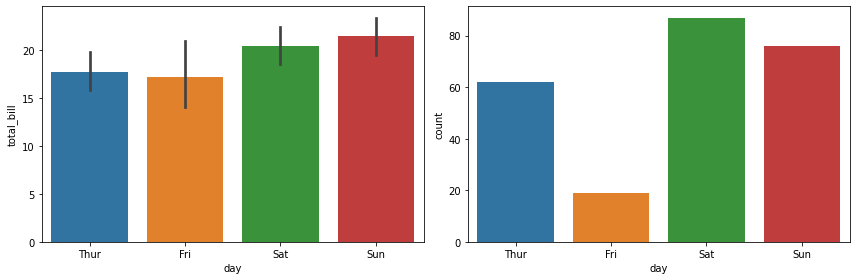

In [262]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x="day", y="total_bill", data=tips, ax = ax[0])
sns.countplot(x="day", data=tips, ax = ax[1])
plt.tight_layout()

In [146]:
tips.groupby("day").mean()

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


In [ ]:
############################################################################################################################

<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Boxplot
As described in the video, a boxplot display distribution through the use of quartiles and an IQR for outliers.

- seaborn.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)</span>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

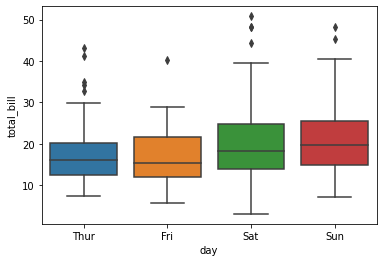

In [263]:
sns.boxplot(x='day', y="total_bill", data=tips)

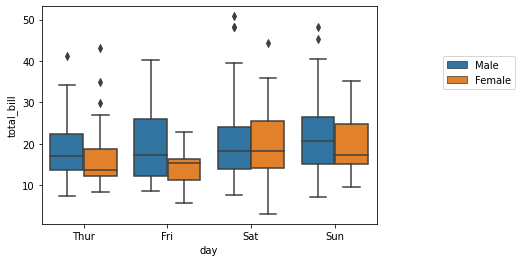

In [275]:
sns.boxplot(x='day', y="total_bill", data=tips, hue = "sex")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=5)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

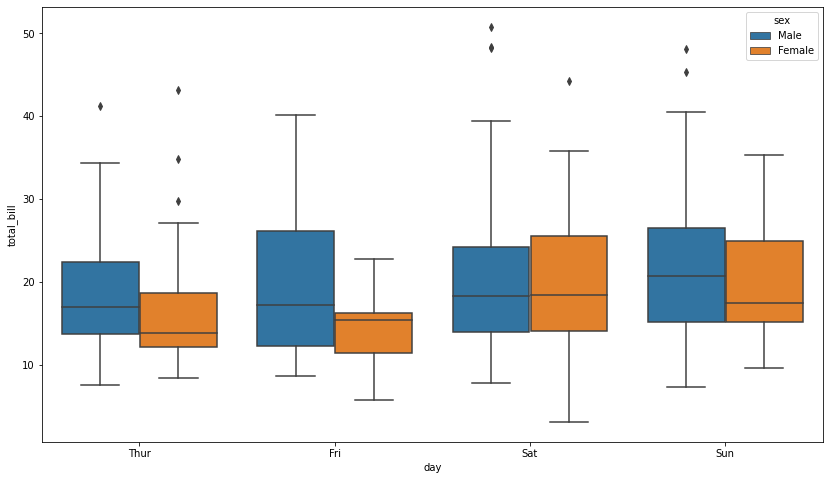

In [269]:
plt.figure(figsize=(14,8))

sns.boxplot(x='day', y="total_bill", data=tips, hue = "sex")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

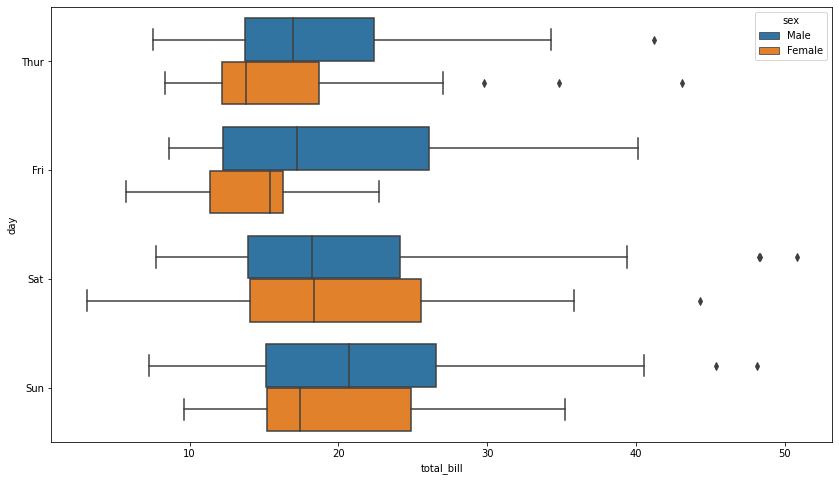

In [272]:
###############################
# Orientation
###############################
plt.figure(figsize=(14,8))

sns.boxplot(y='day', x="total_bill", data=tips, hue = "sex", orient = "h")


<AxesSubplot:xlabel='day', ylabel='total_bill'>

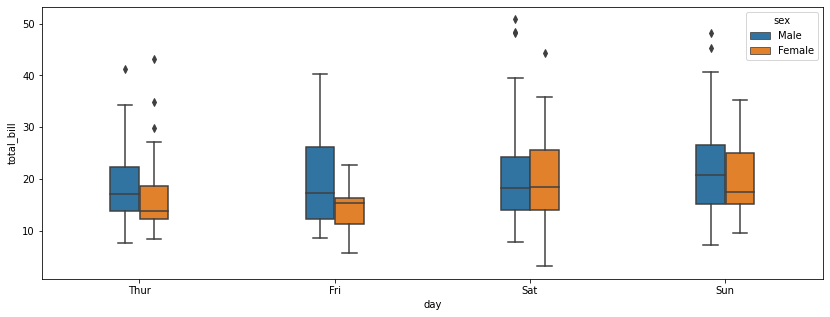

In [273]:
###############################
# width
###############################

plt.figure(figsize=(14,5))
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex',width=0.3)

<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Optional boxplot examples</span>

In [274]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='math score'>

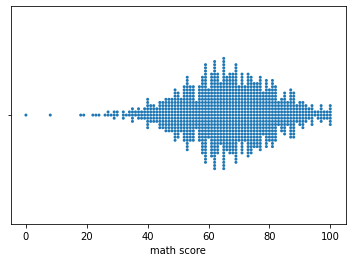

In [302]:
sns.swarmplot(x='math score',data=df, size = 3 )

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

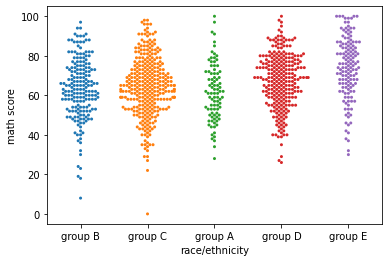

In [303]:
sns.swarmplot(x='race/ethnicity',y='math score',data=df,size=3)

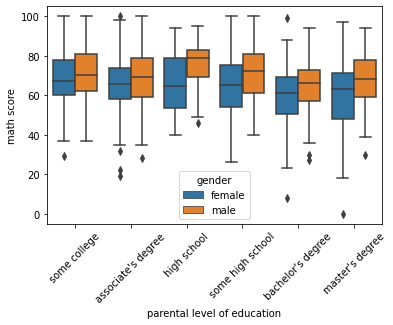

In [285]:
sns.boxplot(x = "parental level of education", y = "math score", data = df, hue= "gender")
ploe = df["parental level of education"].value_counts()

ploe_pos = range(len(ploe.index))
plt.xticks(ploe_pos, ploe.index, rotation=45);

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

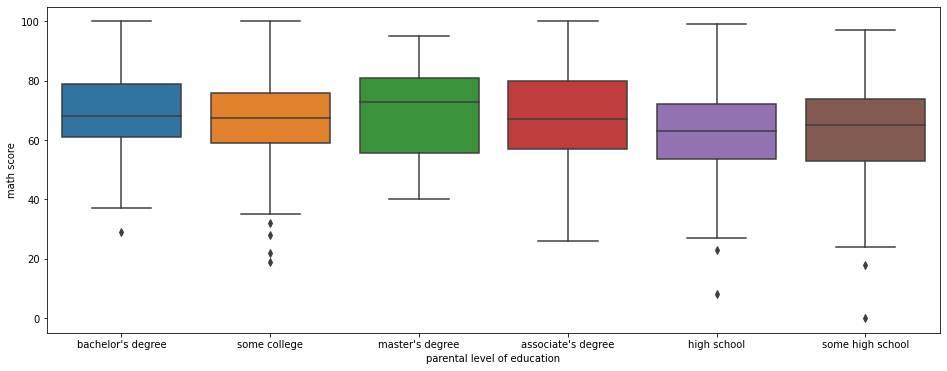

In [283]:
plt.figure(figsize=(16,6))
sns.boxplot(x='parental level of education',y='math score',data=df)

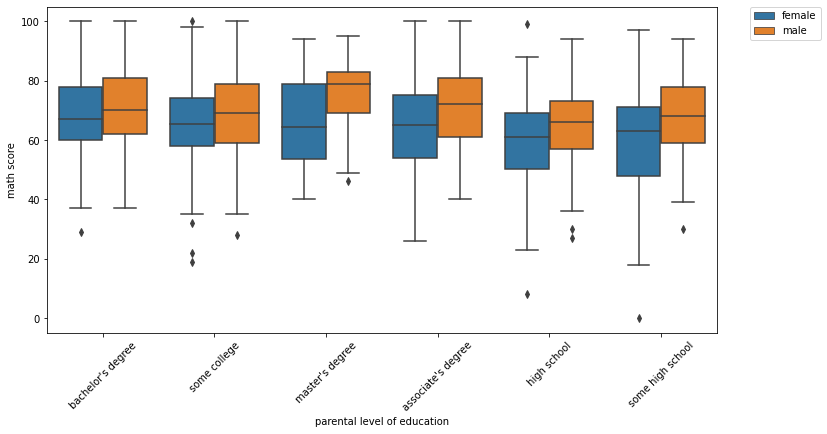

In [288]:
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education',y='math score',data=df,hue='gender')

# Optional move the legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 45);


In [183]:
###############################
# Boxplot Orientation
###############################



In [184]:
###############################
# Width change x and y
###############################



In [ ]:
############################################################################################################################

<div class="alert alert-block alert-danger">

## <span style=" color:Purple">  Violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
    
- seaborn.violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)</span>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

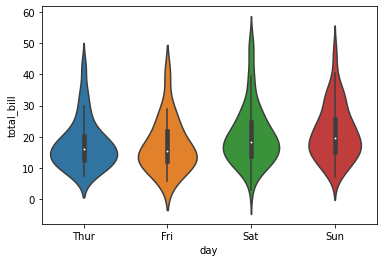

In [289]:
sns.violinplot(x="day", y= "total_bill", data =tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

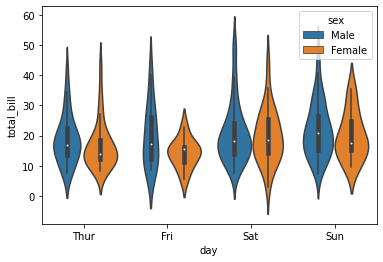

In [290]:
sns.violinplot(x='day', y="total_bill",data=tips, hue="sex")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

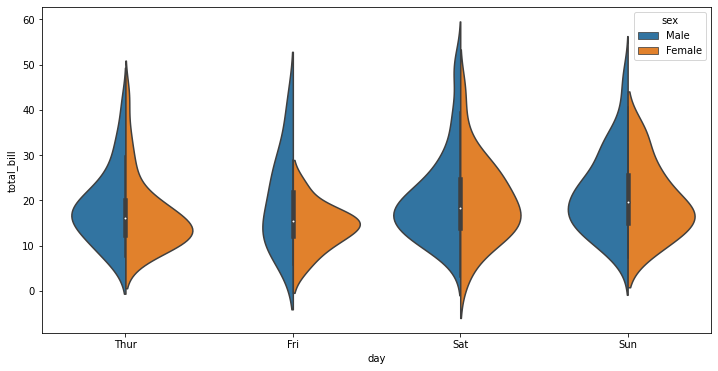

In [291]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

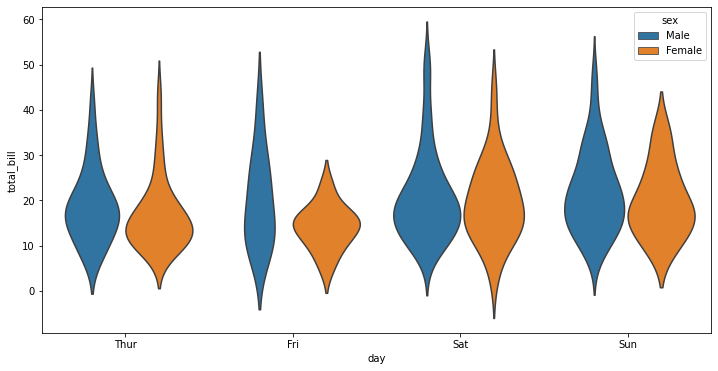

In [292]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y="total_bill",data=tips, hue="sex", inner=None)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

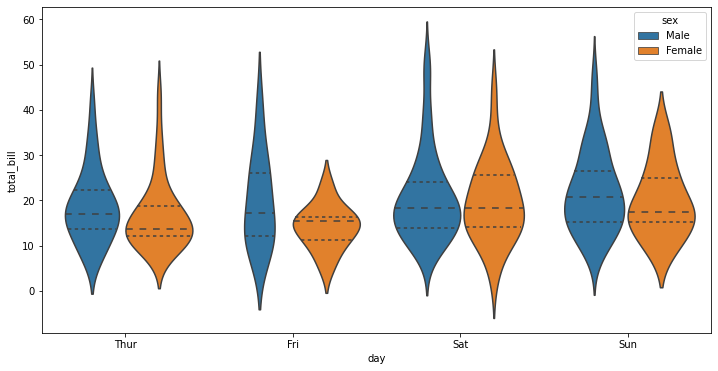

In [293]:
plt.figure(figsize=(12,6))
sns.violinplot(x='day', y="total_bill",data=tips, hue="sex", inner="quartile")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

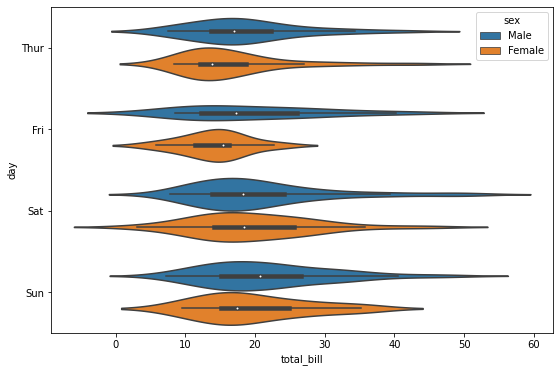

In [294]:
#################################################################################
# oriantation,  just change x and y, you don't need orient param 
#################################################################################
plt.figure(figsize=(9,6))
sns.violinplot(y='day', x="total_bill",data=tips, hue="sex")   



<AxesSubplot:xlabel='day', ylabel='total_bill'>

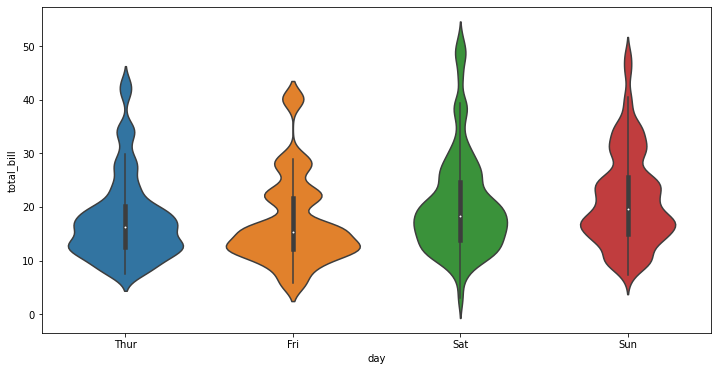

In [295]:
################################################################
## bandwidth
## Similar to bandwidth argument for kdeplot
################################################################

plt.figure(figsize=(12,6))
sns.violinplot(x='day', y="total_bill",data=tips,bw=0.2)

<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Optionel violinplot example </span>

<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Violinplot split
When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.</span>

<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Violinplot inner
default: inner='box'

Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.</span>

In [187]:
###################################################################################
# Simply switch the continuous variable to y and the categorical to x
###################################################################################



<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Bandwidth
Similar to bandwidth argument for kdeplot</span>

In [ ]:
############################################################################################################################


<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Swarmplot 
Draw a categorical scatterplot with non-overlapping points.
- seaborn.swarmplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)</span>

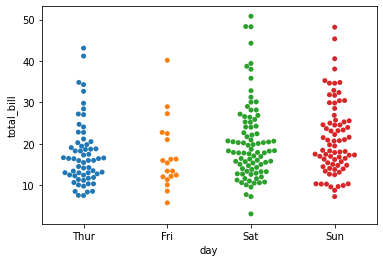

In [296]:
sns.swarmplot(x="day",y="total_bill",data=tips);

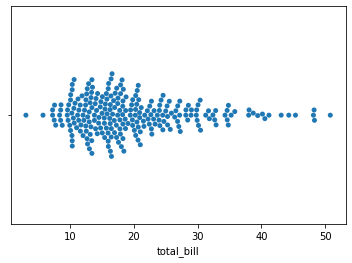

In [297]:
sns.swarmplot(x="total_bill",data=tips);

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

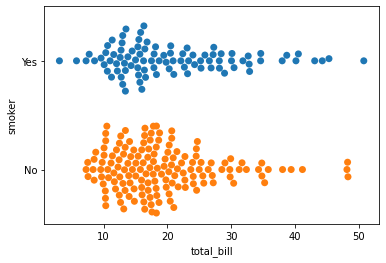

In [298]:
sns.swarmplot(x='total_bill', y="smoker",data=tips, size=7)

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

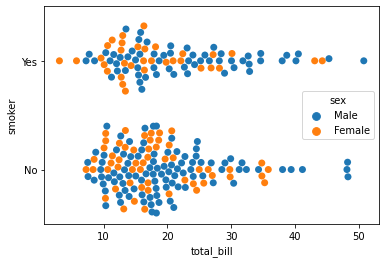

In [299]:
sns.swarmplot(x='total_bill', y="smoker",data=tips,hue= "sex", size=7)

C:\Users\ms\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ms\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

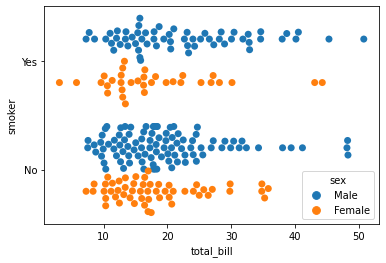

In [300]:
sns.swarmplot(x='total_bill', y="smoker", hue="sex", dodge=True, data=tips, size=7)


<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Optional Swarmplot Examples</span>



<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Boxenplot (letter-value plot)
Official Paper on this plot: https://vita.had.co.nz/papers/letter-value-plot.html

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.</span>


<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

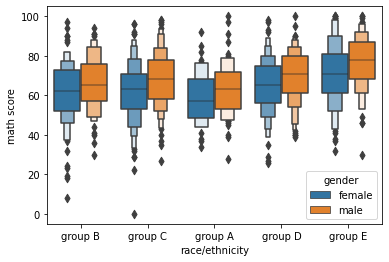

In [306]:
sns.boxenplot(y = "math score", x = "race/ethnicity", data =df,  hue = "gender")

<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Line plot
https://seaborn.pydata.org/generated/seaborn.lineplot.html</span>

In [307]:
print(sns.get_dataset_names())
flights = sns.load_dataset("flights")
flights

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [175]:
flights[flights.month=="May"]

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229
64,1954,May,234
76,1955,May,270
88,1956,May,318
100,1957,May,355
112,1958,May,363


<AxesSubplot:xlabel='year', ylabel='passengers'>

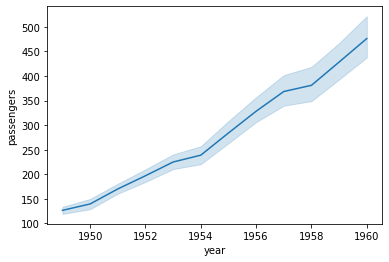

In [308]:
sns.lineplot(x='year', y='passengers',data=flights)

In [310]:
f_sum = flights.groupby(["year", "month"]).sum()
f_sum

passengers
year month            
1949 Jan           112
     Feb           118
     Mar           132
     Apr           129
     May           121
...                ...
1960 Aug           606
     Sep           508
     Oct           461
     Nov           390
     Dec           432

[144 rows x 1 columns]

In [312]:
f_sum.reset_index()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<AxesSubplot:ylabel='passengers'>

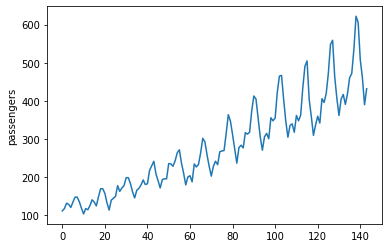

In [314]:
sns.lineplot(y=f_sum.passengers ,x=f_sum.reset_index().index)

In [315]:
flights[flights.month=="May"]

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229
64,1954,May,234
76,1955,May,270
88,1956,May,318
100,1957,May,355
112,1958,May,363


<AxesSubplot:xlabel='year', ylabel='passengers'>

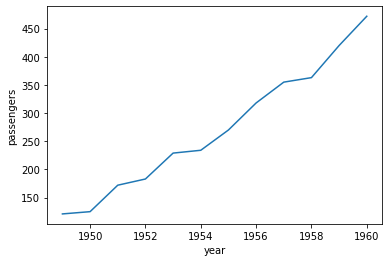

In [316]:
sns.lineplot(x='year', y='passengers',data=flights[flights.month=="May"])

In [317]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [318]:
flights_wide = flights.pivot(index = "year", columns = "month", values = "passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='year'>

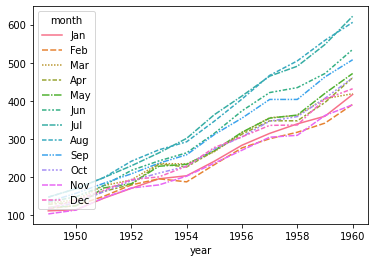

In [319]:
sns.lineplot(data = flights_wide)

<AxesSubplot:xlabel='year', ylabel='passengers'>

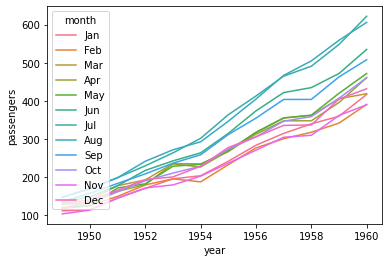

In [320]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")


<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Thanks for Attending!</span>

